<a href="https://colab.research.google.com/github/shubhamtapadia/DataScience_Stuff/blob/main/Password_Strength_Analyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np

In [32]:
from google.colab import drive
drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [33]:
#! pip install xlrd
data = pd.read_csv("/gdrive/MyDrive/DataScience_Stuff/Password_Strenth_Project/pass_data.csv",error_bad_lines=False)
data

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

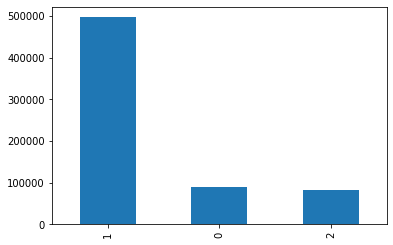

In [35]:
data['strength'].value_counts().plot(kind='bar')
# 0-Poor, 1-Mid, 2-Strong

In [36]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [37]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [38]:
data.dropna(inplace=True)

In [39]:
data.isna().sum()

password    0
strength    0
dtype: int64

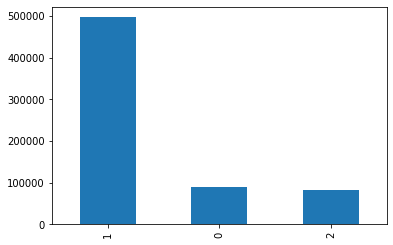

In [40]:
data['strength'].value_counts().plot(kind='bar')
# 0-Poor, 1-Mid, 2-Strong

In [41]:
pass_tupples=np.array(data)
pass_tupples

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [42]:
import random 
random.shuffle(pass_tupples)

In [43]:
#make list comprahansian for get password & strenth this is doing for Independent(x) and Dependent data(y)
x=[lables[0] for lables in pass_tupples]
y=[lables[1] for lables in pass_tupples]

In [45]:
def word_divide_char(inputs):
  character=[]
  for i in inputs:
    character.append(i)
  return character

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

In [47]:
X=vectorizer.fit_transform(x)

In [49]:
X.shape

(669639, 134)

In [50]:
vectorizer.get_feature_names()

['\x02',
 '\x04',
 '\x05',
 '\x06',
 '\x08',
 '\x0e',
 '\x0f',
 '\x10',
 '\x12',
 '\x13',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1d',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '\x8d',
 '\xa0',
 '¡',
 '¤',
 '¦',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '·',
 'º',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'í',
 'î',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ú',
 'û',
 'ý',
 'þ',
 'ÿ',
 '—',
 '‚',
 '‡',
 '™']

In [51]:
first_doc_vector=X[0]
first_doc_vector

<1x134 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [52]:
first_doc_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56661454],
        [0.        ],
        [0.59186379],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [54]:
df=pd.DataFrame(first_doc_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['TF-IDF'])
df

,TF-IDF
,0.0
,0.0
,0.0
,0.0
,0.0
...,...
ÿ,0.0
—,0.0
‚,0.0
‡,0.0


In [81]:
a=X.shape[0]

print("X shape : "+str(a)+"\nY Shape : "+str(len(y)))

X shape : 669639
Y Shape : 669639


In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [85]:
X_train.shape

(535711, 134)

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
clf=LogisticRegression(random_state=0, multi_class='multinomial')

In [88]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [118]:
testing_Pass=np.array(['*^!13Sewrt'])
pred=vectorizer.transform(testing_Pass)
clf.predict(pred)
# 0-Poor, 1-Average, 2-Strong

array([2])

In [119]:
clf.score(X_test,y_test)

0.8181410907353205

In [120]:
y_predict=clf.predict(X_test)
y_predict

array([1, 1, 1, ..., 1, 1, 2])

In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [122]:
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

[[ 5253 12664    17]
 [ 3882 92717  2621]
 [   50  5122 11602]]
0.8181410907353205


In [124]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.57      0.29      0.39     17934
           1       0.84      0.93      0.88     99220
           2       0.81      0.69      0.75     16774

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928

